<a href="https://colab.research.google.com/github/rdf-fra/book-management/blob/main/Bildbearbeitung_Teil_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bildmanipulation Teil 2 - Manipulation der Bilddatei
# Einleitung

In diesem zweiten Teil lernen Sie konkrete Werkzeuge zur Bearbeitung von Bildern kennen. Aufbauend auf den Grundlagen aus Teil 1 arbeiten wir mit typischen Techniken der Bildverarbeitung wie **Zuschneiden**, **Spiegeln**, **Weichzeichnen** und **Kantenerkennung**.

<p>
<img src="https://raw.githubusercontent.com/volki1992/Bildbearbeitung/main/Einleitung_Teil2.png"
height="140">
</p>

**Wir behandeln folgende Themen:**
* Zugriff auf einzelne Pixel
* Zugriff auf ganze Bereiche (Regionen)
* Zuschneiden (Croppen)
* Spiegeln eines Bildes
* Filteranwendung auf Bilder



In [ ]:
# Bibliotheken importieren
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 1.&nbsp; Zugriff auf Pixel

Ein digitales Bild ist im Kern nichts anderes als eine Matrix – also eine zweidimensionale Tabelle von Werten.
Jede Zelle dieser Matrix entspricht einem Pixel, also einem einzelnen Bildpunkt.

**Das bedeutet:** Ein Farbbild mit der Größe 480 × 640 besteht aus einer Matrix mit 480 Zeilen und 640 Spalten.

<p>
<img src="https://raw.githubusercontent.com/volki1992/Bildbearbeitung/main/single_Pixel.png"
height="200">
</p>

Um auf den Pixel zuzugreifen ist also die entsprechende Zeile und Spalte zu addressieren. Der Zugriff auf eine Zelle des Arrays (der Matrix) erfolg mit dem Operator `[]`

**Beispiel - Zugriff auf den im Bild markierten Pixel:** `img[50, 200]`

In Farbbildern ist jeder Pixel wiederum eine Gruppe von drei Werten, die die Farbintensitäten in den drei Kanälen Rot, Grün und Blau (RGB) beschreiben.

Jede einzelne Zelle der Bildmatrix enthält also ein Array mit drei Werten für die Farben.

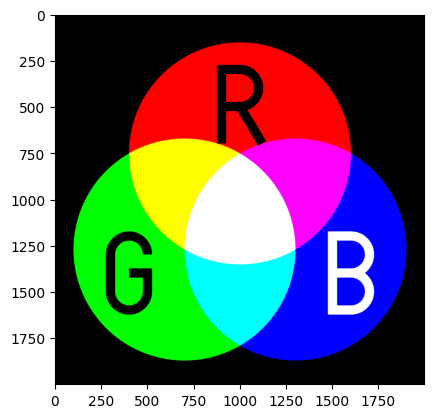

Pixel an Position: Zeile=500, Spalte=750
Pixelwerte:     R=255, G=0, B=0


In [ ]:
img = cv2.imread('/content/RGB.png')   #Bilddatei wird in die Variable img geladen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #Convertiert den Farbraum von BGR zu RGB
plt.imshow(img)  #Plottet das Bild
plt.axis('on')   #xy-Achse anzeigen
plt.show()   #Zeigt das Bild an

# Addressierung der einzelnen Pixel
y = 500   #Zeile in der sich der Pixel befindet
x = 750   #Spalte in der sich der Pixel befindet

# Zugriff auf den Pixel in der entsprechenden Zeile und Spalte
[R, G, B] = img[y, x]   #RGB Pixelwert wird in die Variablen R, G und B gespeichtert

# Ausgabe der RGB Pixelwerte für den addressiereten Pixel
print(f'Pixel an Position: Zeile={y}, Spalte={x}')
print(f'Pixelwerte:     R={R}, G={G}, B={B}')

## ✏️Aufgabe 1
* Passen Sie den Code so an, dass Sie die RGB Werte folgender Pixel erhalten:
  * Mitte des Bildes (weißen Bereich)
  * Den Blauen Bereich
  * Den Grünen Bereich
  * Den Roten Bereich
  * den Gelben Bereich
  * ...
* Lassen Sie sich die Print Funktion von ChatGPT oder Gemini erklären

    `print(f'Pixel an Position: Zeile={y}, Spalte={x}')`

In [ ]:
# Aufgabe 2: HIER CODE EINFÜGEN UND KOMMENTIEREN
#===============================================
# Nutzen Sie die bekannten "Code Schnippsel" aus Teil 1 und Teil 2

## ✏️Aufgabe 2
* Erstellen Sie den Code um auf die einzelnen Pixel eines Schwarz-Weiß Bildes zugreifen zu können.
* Der Pixelwert soll wie in der in Aufgabe 1 über eine formatierte Print Funktion ausgegeben werden.

# 2.&nbsp; Zugriff auf Bildbereiche

Neben einzelnen Pixeln ist es möglich auf ganze Bereiche (Region of Intrest - ROI) in einem Bild zuzugreifen.

<p>
<img src="https://raw.githubusercontent.com/volki1992/Bildbearbeitung/main/ROI_landscape.png"
height="240">
</p>

**Mit folgendem Code kann ein rechteckiger Bereich (ROI) aus einem Bild extrahiert werden:**

```python
roi = img[y_start : y_end , x_start : x_end]
```


* **`img`:** Das Bild, auf das zugegriffen wird.
* **`:` (Doppelpunkt):** Mit diesem Operator wird ein Ausschnitt aus dem Bild gewählt.
* **`y_start`:** Die Variable gibt die Startzeile des ausgewählten Bereichs an.
* **`y_start : y_end`:** Dieser Ausdruck gibt den vertikalen Bereich (Zeilen) an
* **`x_start : x_end`:** Dieser Ausdruck gibt den horizontalen Bereich (Spalten) an
* Zusammengenommen entsteht ein **rechteckiger Bereich**, auf dessen Pixel zugegriffen wird.
* **`roi`:** In dieser Variable wird der ausgewählte Bildausschnitt (ROI) gespeichert.


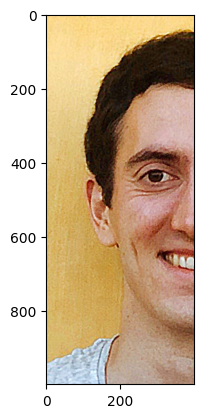

In [ ]:
img = cv2.imread('/content/man.jpg')   #Bilddatei wird in die Variable img geladen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #Convertiert den Farbraum von BGR zu RGB

# Definition der Koordinaten für den Bildausschnitt (ROI)
y_start = 1500   #Startzeile (oben)
y_end = 2500   #Endzeile (unten)
x_start = 1100   #Startspalte (rechts)
x_end = 1500   #Endspalte (links)

# Zugriff auf alle Pixel im Bildausschnitt
roi = img[y_start:y_end, x_start:x_end]

plt.imshow(roi)   #Plottet den Bildausschnitt
plt.axis('on')   #xy-Achse anzeigen
plt.show()   #Zeigt deb geplotteten Bildausschnitt an



## ✏️Aufgabe 3
Verändern Sie den Bereich den Sie ausschneiden wollen.

In [ ]:
# Aufgabe 4: HIER CODE EINFÜGEN UND KOMMENTIEREN
#===============================================
# Nutzen Sie die bekannten "Code Schnippsel" aus Teil 1 und Teil 2

## ✏️Aufgabe 4
* Laden Sie das Bild des Mannes `man.jpg` aus den Bildervorlagen.
* **Färben Sie den Kopf des Mannes im Bild weiß ein.**
* Plotten Sie das Bild mit dem gefärbten Kopf.

💡 *Hinweis:*
* Welcher Pixelbereich ist zu färben? (`y_start`, `y_end`, `x_start` und `x_end` sind zu bestimmen)
* Welchen RGB Wert hat die Farbe weiß?
* Der RGB Wert ist als Ausdruck `[R,G,B]` (z.B. `[255,0,0]` für Rot) in den entsprechenden Ausschnitt des Bildarrays zu schreiben



# 3.&nbsp; Werkzeuge zur Bildbearbeitung
In diesem Abschnitt lernen Sie einige nützliche Funktionen aus der Bibliothek `cv2` (OpenCV) kennen, mit denen Sie Bilder gezielt bearbeiten und verändern können.

Diese Funktionen bilden eine Art digitalen Werkzeugkasten, mit dem Sie z.B. Bereiche färben (siehe Aufgabe 4), Bilder zuschneiden, Bilder Spiegeln, ... können.


## 3.1&nbsp; Zuschneiden (Cropping)

Cropping bezeichnet das Zuschneiden eines Bildes auf einen bestimmten Bereich. Dabei wird ein Rechteck (Region of Interest, kurz ROI) aus dem Originalbild ausgewählt, und nur dieser Teil weiterverwendet.

Das ist besonders nützlich, wenn nur ein bestimmter Bildausschnitt relevant ist – etwa ein Gesicht, ein Objekt.

<p>
<img src="https://raw.githubusercontent.com/volki1992/Bildbearbeitung/main/Cropping.png"
height="200">
</p>

In [ ]:
img = cv2.imread('/content/landscape.jpg')   #Bilddatei wird in die Variable img geladen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #Convertiert den Farbraum von BGR zu RGB

# Definition der Koordinaten für den Bildzuschnitt
y_start = 1500   #Startzeile (oben)
y_end = 2500   #Endzeile (unten)
x_start = 1100   #Startspalte (rechts)
x_end = 1500   #Endspalte (links)

# Zuschneiden des Bildes
cropped_img = img[y_start:y_end, x_start:x_end]

# Anzeige des zugeschnittenen Bildes
plt.imshow(cropped_img)   #Plottet den Bildzuschnitt
plt.axis('on')   #xy-Achse anzeigen
plt.show()   #Zeigt deb geplotteten Bildzuschnitt an


cv2.imwrite('/content/cropped_img.jpg', cropped_img) # CODE KOMMENTIEREN

### ✏️Aufgabe 5
* Überlegen Sie was die Funktion `imwrite()` macht
* Kommentieren Sie den Code.

## 3.2&nbsp; Spiegeln eines Bildes

Flipping bezeichnet das Spiegeln eines Bildes an einer bestimmten Achse – entweder horizontal (linke und rechte Seite werden vertauscht) oder vertikal (oben und unten werden vertauscht).

Das Spiegeln ist besonders hilfreich, wenn ein Bild aus einer anderen Perspektive dargestellt werden soll – zum Beispiel für Datenaugmentation im Machine Learning oder zur kreativen Gestaltung.

<p>
<img src="https://raw.githubusercontent.com/volki1992/Bildbearbeitung/main/Flipping.png"
height="200">
</p>


OpenCV bietet die Funktion `cv2.flip()`, um Bilder zu spiegeln:
- `cv2.flip(img, 1)`: Flip (Spiegeln) über die horizontale Achse
- `cv2.flip(img, 0)`: Flip (Spiegeln) über die vertikale Achse

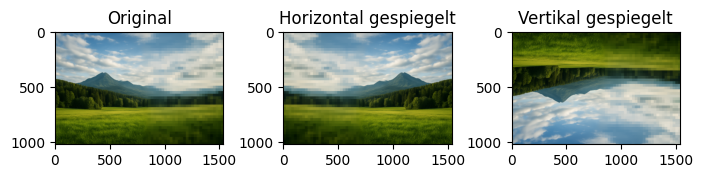

In [ ]:
img = cv2.imread('/content/landscape.png')   #Bilddatei wird in die Variable img geladen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #Convertiert den Farbraum von BGR zu RGB

# Horizontal spiegeln
flipped_h = cv2.flip(img, 1)

# Vertikal spiegeln
flipped_v = cv2.flip(img, 0)



# Anzeige der gespiegelten Bilder in einzelnen Subplots
plt.figure(figsize=(7, 4))   #Festlegen der Plot Größe

#Subplot 1: Original:
plt.subplot(1, 3, 1)   # CODE KOMMENTIEREN
plt.imshow(img)
plt.title("Original")
plt.axis('on')
#Subplot 2: Horizontal gespiegelt:
plt.subplot(1, 3, 2)   # CODE KOMMENTIEREN
plt.imshow(flipped_h)
plt.title("Horizontal gespiegelt")
plt.axis('on')
#Subplot 3 Vertikal gespiegelt:
plt.subplot(1, 3, 3)   # CODE KOMMENTIEREN
plt.imshow(flipped_v)
plt.title("Vertikal gespiegelt")
plt.axis('on')

plt.tight_layout()   # CODE KOMMENTIEREN
plt.show()





### ✏️Aufgabe 6
* Überlegen Sie was die Funktion `plt.subplot(1, 3, 1)` macht.
* Überlegen Sie was die Funktion `plt.tight_layout()` macht.
* Kommentieren Sie den Code.

## 3.3&nbsp; Blur Filter

Der Box Blur (auch Durchschnittsfilter genannt) ist die einfachste Methode zur Weichzeichnung eines Bildes. Dabei wird jeder Pixel durch den Durchschnitt der umliegenden Pixelwerte ersetzt.

Diese Methode ist schnell und effizient, kann aber Kanten stärker verwischen als andere Filter.

<p>
<img src="https://raw.githubusercontent.com/volki1992/Bildbearbeitung/main/Blurred.png"
height="200">
</p>

```python
cv2.blur(img, (ksize, ksize))
```
* **`img`:** Eingangsbild
* **`(ksize, ksize)`:** Größe des Mittelwert-Kernels (z.B. `(5, 5)`)

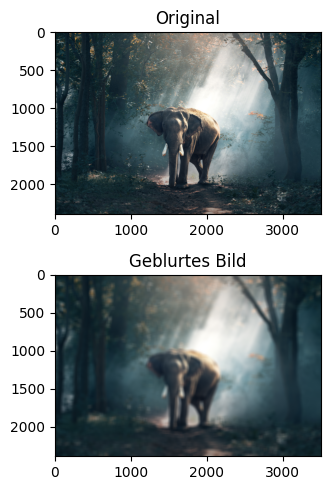

In [ ]:
img = cv2.imread('/content/elephant.jpg')   #Bilddatei wird in die Variable img geladen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #Convertiert den Farbraum von BGR zu RGB

# Blur Filter anwenden
blurred_img = cv2.blur(img, (50,50))

# Anzeige der gespiegelten Bilder in einzelnen Subplots
plt.figure(figsize=(5, 5))   #Festlegen der Plot Größe

#Subplot 1: Original:
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('on')
#Subplot 2: Geblurtes Bild:
plt.subplot(2, 1, 2)
plt.imshow(blurred_img)
plt.title("Geblurtes Bild")
plt.axis('on')

plt.tight_layout()
plt.show()

### ✏️Aufgabe 7
* Verändern Sie die Werte des Kernels `(ksize, ksize)`
* Wann wird der Blur stärker?
* Wann wird der Blur schwächer?

## 3.4&nbsp; Kantenerkennung

Der Canny-Filter ist ein moderner, mehrstufiger Algorithmus zur präzisen Kantenerkennung in Bildern. Er kombiniert mehrere Verarbeitungsschritte, um nur die wichtigsten und klarsten Kanten zu erkennen.

Canny ist heute der Standard in der Computer Vision, etwa bei der Objekterkennung oder in der Robotik.

<p>
<img src="https://raw.githubusercontent.com/volki1992/Bildbearbeitung/main/Edges2.png"
height="240">
</p>

**Beim Canny Filter ist das Bild als Schwarz-Weiß Bild zu laden:**

```python
cv2.Canny(image, threshold1, threshold2)
```
* **`img`:** Eingangsbild
* **`threshold1`:** unterer Schwellwert der Kantenerkennung
* **`threshold2`:** oberer Schwellwert der Kantenerkennung
* `100,200` sind gut Standartwerte

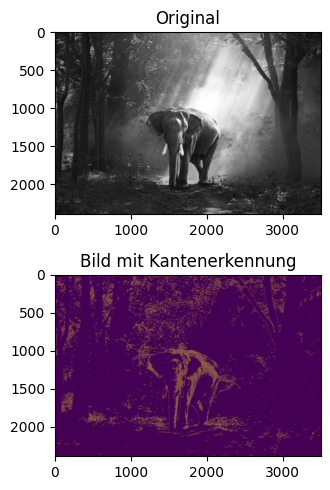

In [ ]:
img = cv2.imread('/content/elephant.jpg', 0)   #Bilddatei wird in die Variable img geladen

# Blur Filter anwenden
edges_img = cv2.Canny(img, 100, 200)

# Anzeige der gespiegelten Bilder in einzelnen Subplots
plt.figure(figsize=(5, 5))   #Festlegen der Plot Größe

#Subplot 1: Original:
plt.subplot(2, 1, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('on')
#Subplot 2: Gefiltertes Bild:
plt.subplot(2, 1, 2)
plt.imshow(edges_img)
plt.title("Bild mit Kantenerkennung")
plt.axis('on')

plt.tight_layout()
plt.show()

### ✏️Aufgabe 8
* Verändern Sie die Werte von `threshold1` und `threshold2`
* Beobachten Sie die Auswirkung

# 4.&nbsp; Zusatzaufgaben

## ✏️Zusatzaufgabe 1: Weitere Werkzeuge
Testen Sie weitere Filter aus der `cv2` Bibliothek. Hier ein paar Vorschläge:
* `cv2.medianBlur()`
* Drehen einen Bildes um eine Rotationspunkt
* Zusammenfügen von Bildausschnitten
* ...


In [ ]:
# HIER CODE EINFÜGEN

## ✏️Zusatzaufgabe 2: Bild drehen

Erstellen Sie einen Python Code der ein Bild um einen Rotationspunkt dreht und abspeichert.

💡 *Hinweis:*
* Starten Sie mit dem Drehpunkt im Zentrum des Bildes
* Nutzen Sie KI zur Lösung der Problemstellung.


In [ ]:
# HIER CODE EINFÜGEN

## ✏️Zusatzaufgabe 3: Mehrere Bilder automatisch spiegeln

* Schreiben Sie ein Skript das alle Bilder aus einem  Ordner automatisch nacheinander einliest.
* Verwenden Sie den Ordner `test_images`.
* Spiegen Sie jedes Bild entlang derr vertikalen Achse.
* Speichern Sie die gespiegelten Bilder im Ordner `horizontal_flip`ab

💡 *Hinweis:*
* Achten Sie darauf, dass der Zielordner `horizontal_flip` existiert oder im Code erstellt wird, falls er nicht vorhanden ist.
* Zur Umsetzung benötigen Sie eine *for* - Schleife. wählt einmal jedes Bild im angegeben Ordner aus.
* Nutzen Sie KI zur Lösung der Problemstellung.

In [ ]:
# HIER CODE EINFÜGEN